Prashna Prajapati

 3 Tasks- To- Do:

 Please Solve all the Problems as instructed:

 3.1 Problem- 1: Getting Started with Data Exploration- Some Warm up
 Exercises:

 1. Data Exploration and Understanding:

 • Dataset Overview:

    1. Load the dataset and display the first 10 rows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


 2. Identify the number of rows and columns in the dataset.

In [ ]:
df.shape

(143, 9)

3. List all the columns and their data types.

In [ ]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
 1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print("Mean score:", mean_score)
print("Median score:", median_score)
print("Standard Deviation score:", std_score)

Mean score: 5.52758041958042
Median score: 5.785
Standard Deviation score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:
# Identify the country with the highest and lowest happiness scores
max_score_country = df.loc[df['score'].idxmax(),]
min_score_country = df.loc[df['score'].idxmin(),]

# Print the results
print(f"Country with the highest happiness score: {max_score_country}")
print(f"Country with the lowest happiness score: {min_score_country}")


Country with the highest happiness score: Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: object
Country with the lowest happiness score: Country name                    Afghanistan
score                                 1.721
Log GDP per capita                    0.628
Social support                          0.0
Healthy life expectancy               0.242
Freedom to make life choices            0.0
Generosity                            0.091
Perceptions of corruption             0.088
Dystopia + residual                   0.672
Name: 142, dtype: object


• Missing Values:
 1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:
missing_columns = df.isnull()
missing_columns.sum()

,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


• Filtering and Sorting:
 1. Filter the dataset to show only the countries with a Score greater than 7.5.


In [ ]:
filtered_df = df[df['score'] > 7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


 2. For the filtered dataset- Sort the dataset by GDP per Capita in descending order and display the
 top 10 rows.

In [ ]:
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
top_10_rows = sorted_filtered_df.head(10)
top_10_rows

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:
 1. Create a new column called Happiness Category that categorizes countries into three categories
 based on their Score:

 Low −(Score < 4)

 Medium −(4 ≤ Score ≤ 6)

 High −(Score > 6)

In [ ]:
import numpy as np

conditions = [
    df['score'] < 4,
    (df['score'] >= 4) & (df['score'] <= 6),
    df['score'] > 6
]

categories = ['Low', 'Medium', 'High']

df['Happiness Category'] = np.select(conditions, categories)
df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102,Low
139,Sierra Leone,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068,Low
140,Lesotho,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


 2. Data Visualizations:

 • Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

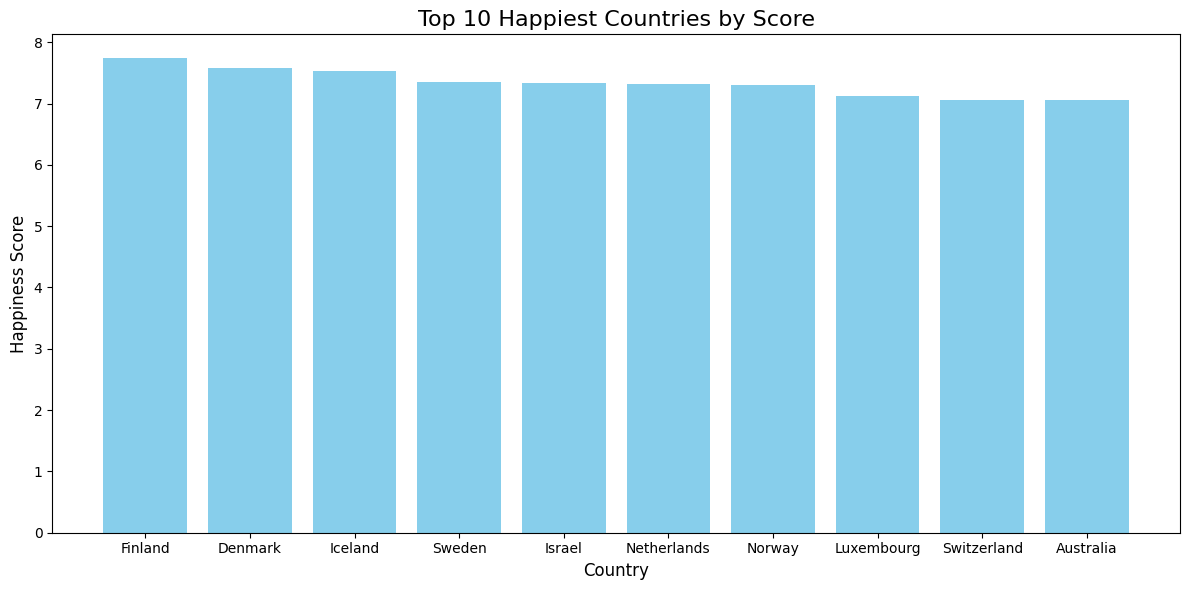

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame to get the top 10 happiest countries by score
top_10_countries = df.sort_values('score', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country name'], top_10_countries['score'], color='skyblue')

# Set the labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Happiest Countries by Score', fontsize=16)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

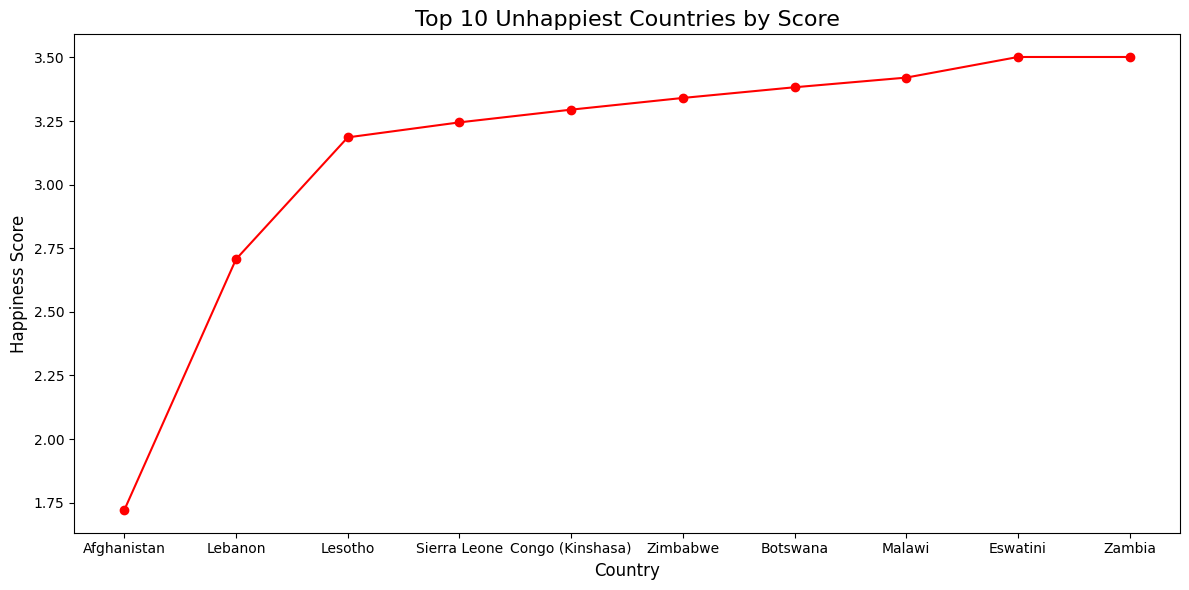

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame to get the top 10 unhappiest countries by score (ascending order)
top_10_unhappy_countries = df.sort_values('score', ascending=True).head(10)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(top_10_unhappy_countries['Country name'], top_10_unhappy_countries['score'], marker='o', linestyle='-', color='red')

# Set the labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Top 10 Unhappiest Countries by Score', fontsize=16)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


 • Plot a histogram for the Score column to show its distribution and also interpret.

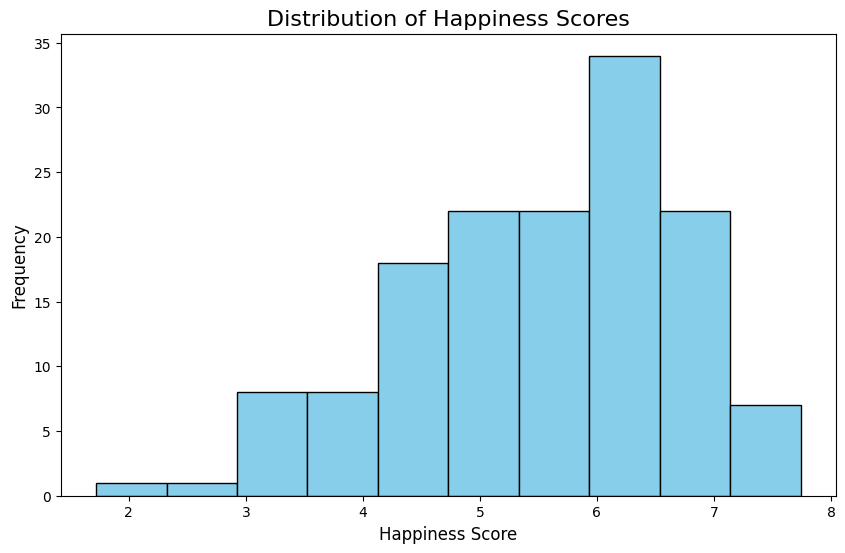

In [ ]:
import matplotlib.pyplot as plt

# Create the histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], color='skyblue', edgecolor='black')

# Set the labels and title
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Happiness Scores', fontsize=16)

# Display the plot
plt.show()


 • Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

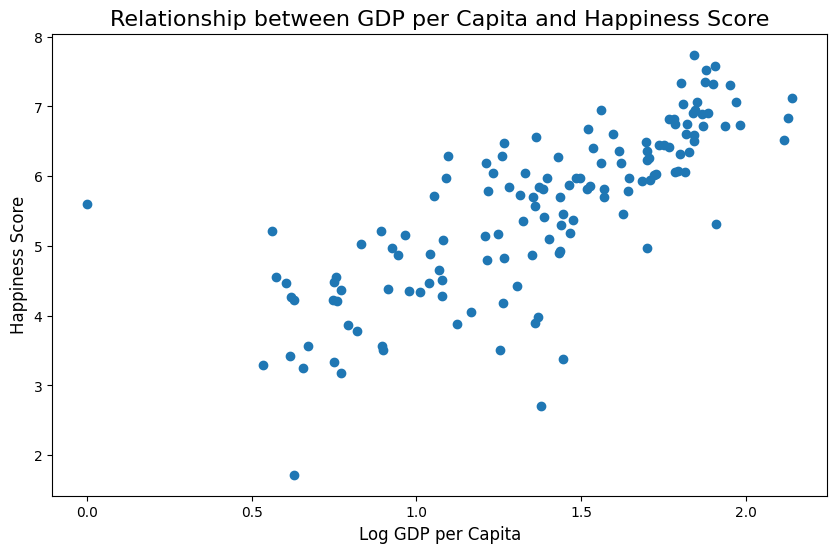

In [ ]:
import matplotlib.pyplot as plt

# Create the scatter plot between GDP per Capita and Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'])

# Set the labels and title
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Relationship between GDP per Capita and Happiness Score', fontsize=16)

# Display the plot
plt.show()


3.2 Problem- 2- Some Advance Data Exploration Task:

 Task- 1- Setup Task- Preparing the South-Asia Dataset:

 Steps:
 1. Define the countries in South Asia with a list for example:

 south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
 "Maldives", "Nepal", "Pakistan", "Srilanka"]

In [ ]:
# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [ ]:
# Filter the DataFrame to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered DataFrame
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


 3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
filtered_df.to_csv('filtered_countries.csv', index=False)
sorted_filtered_df.to_csv('sorted_filtered_countries.csv', index=False)
south_asia_df.to_csv('south_asia_countries.csv', index=False)

Task- 2- Composite Score Ranking:

 Tasks:

 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
 following metrics:

 Composite Score = 0.40×GDP per Capita+0.30×Social Support +0.30 ×Healthy Life Expectancy

In [ ]:
# Create the Composite Score column in the DataFrame
south_asia_df.loc[:,'Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Display the updated DataFrame
south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']]


,Country name,Log GDP per capita,Social support,Healthy life expectancy,Composite Score
92,Nepal,0.965,0.990,0.443,0.8159
107,Pakistan,1.069,0.600,0.321,0.7039
125,India,1.166,0.653,0.417,0.7874
128,Bangladesh,1.122,0.249,0.513,0.6774
142,Afghanistan,0.628,0.000,0.242,0.3238


 2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
# Sort the DataFrame by Composite Score in descending order
ranked_south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

#Display the Dataframe
ranked_south_asia_df[['Country name','Composite Score']]

,Country name,Composite Score
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

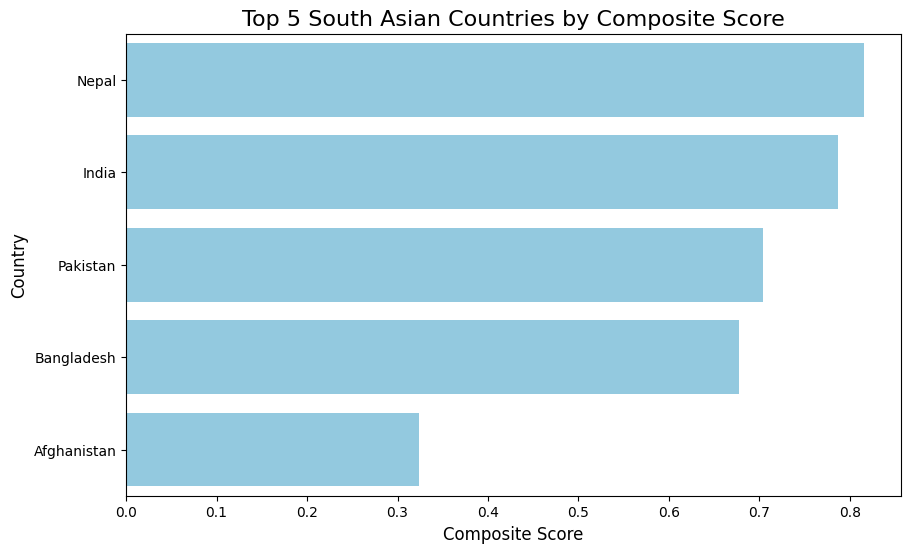

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 countries based on Composite Score
top_5_countries = ranked_south_asia_df.head()

# Create a horizontal bar chart without specifying the palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_countries, color='skyblue')

# Add title and labels
plt.title('Top 5 South Asian Countries by Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.show()


 4. Discuss whether the rankings based on the Composite Score align with the original Score- support your
 discussion with some visualization plot.

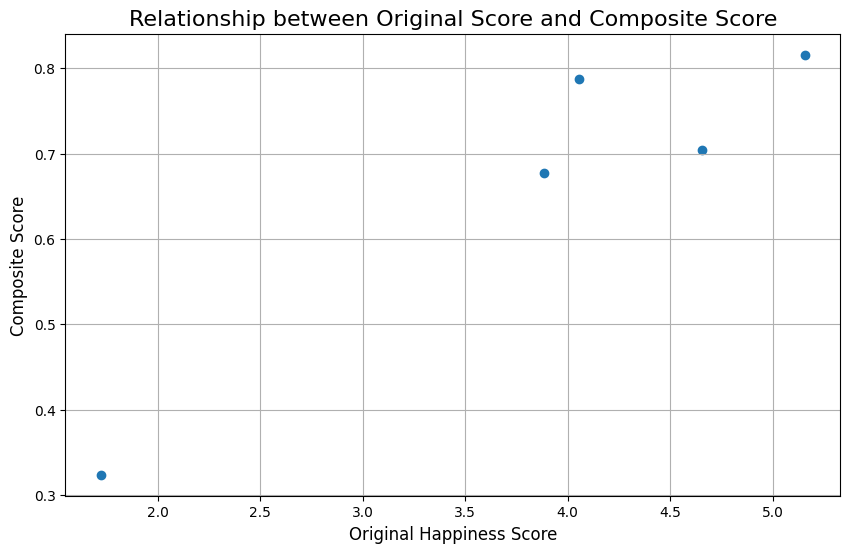

Correlation between Original Score and Composite Score: 0.944667604983821


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'])

# Add title and labels
plt.xlabel('Original Happiness Score',fontsize=12)
plt.ylabel('Composite Score',fontsize=12)
plt.title('Relationship between Original Score and Composite Score',fontsize=16)
plt.grid(True)

# Show the plot
plt.show()

correlation = south_asia_df['score'].corr(south_asia_df['Composite Score'])
print(f"Correlation between Original Score and Composite Score: {correlation}")

 Task- 3- Outlier Detection:

 Tasks:

 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

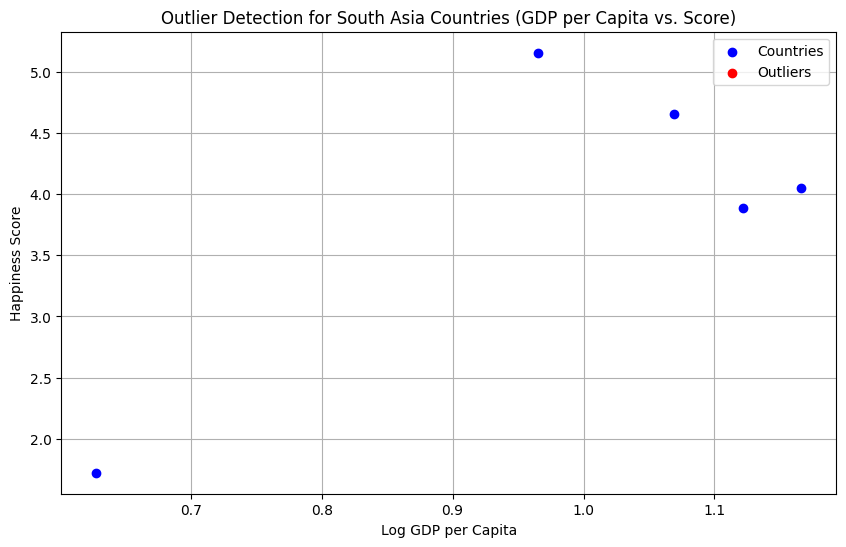

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the initial scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Countries', color='blue')
plt.title('Outlier Detection for South Asia Countries (GDP per Capita vs. Score)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')

# Manually calculating Z-scores for GDP per capita and Score
gdp_mean = south_asia_df['Log GDP per capita'].mean()
gdp_std = south_asia_df['Log GDP per capita'].std()

score_mean = south_asia_df['score'].mean()
score_std = south_asia_df['score'].std()

# Use .loc[] to avoid the SettingWithCopyWarning
south_asia_df.loc[:, 'GDP_ZScore'] = np.abs((south_asia_df['Log GDP per capita'] - gdp_mean) / gdp_std)
south_asia_df.loc[:, 'Score_ZScore'] = np.abs((south_asia_df['score'] - score_mean) / score_std)

# Define a threshold for outliers
threshold = 2.5
outlier_countries = south_asia_df[(south_asia_df['GDP_ZScore'] > threshold) | (south_asia_df['Score_ZScore'] > threshold)]

# Highlight outliers in red
plt.scatter(outlier_countries['Log GDP per capita'], outlier_countries['score'], color='red', label='Outliers')

plt.legend()
plt.grid()
plt.show()

 2. Define outliers using the 1.5 × IQR rule.

In [ ]:
def outliers_iqr(data, column_name):
    """
    Detect outliers in a DataFrame column using the 1.5 × IQR rule.

    Parameters:
        data (pd.DataFrame): The dataset.
        column_name (str): The column name to check for outliers.

    Returns:
        tuple: Lower bound, upper bound, and a DataFrame of outliers.
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    return lower_bound, upper_bound, outliers


score_lower, score_upper, score_outliers = outliers_iqr(south_asia_df, "score")
gdp_lower, gdp_upper, gdp_outliers = outliers_iqr(south_asia_df, "Log GDP per capita")

print("Score Outliers:")
print(score_outliers[["Country name", "score"]])

print("\nGDP Outliers:")
print(gdp_outliers[["Country name", "Log GDP per capita"]])


Score Outliers:
    Country name  score
142  Afghanistan  1.721

GDP Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
 in a different color.

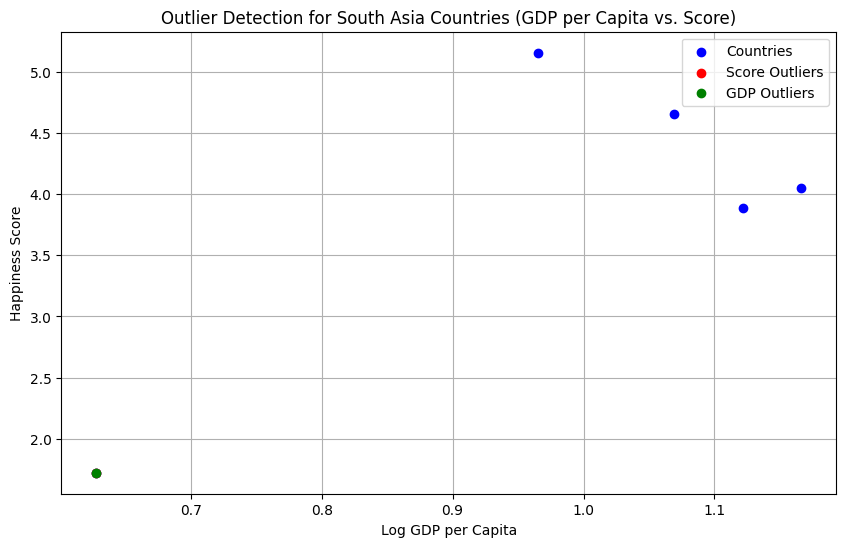

In [ ]:
# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))

# Plot all countries
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label='Countries', color='blue')

# Highlight outliers based on IQR
plt.scatter(score_outliers['Log GDP per capita'], score_outliers['score'], color='red', label='Score Outliers')
plt.scatter(gdp_outliers['Log GDP per capita'], gdp_outliers['score'], color='green', label='GDP Outliers')


plt.title('Outlier Detection for South Asia Countries (GDP per Capita vs. Score)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()

 4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Ans: Outliers in South Asia, like Afghanistan with very low GDP and happiness scores, pull down the regional averages and increase variability.They highlight inequalities and show areas needing urgent attention to improve overall happiness and economic conditions in the region.

 Task- 4- Exploring Trends Across Metrics:

 Tasks:
 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
 {pearson correlation} with the Score for South Asian countries.

In [ ]:
# Select the relevant columns: Score, Freedom to Make Life Choices, and Generosity
metrics = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']]

# Calculate the Pearson correlation between the chosen metrics and Score
correlation_matrix = metrics.corr()

# Display the correlation values
print(correlation_matrix['score'])

score                           1.000000
Freedom to make life choices    0.801498
Generosity                      0.877333
Name: score, dtype: float64


 2. Create scatter plots with trendlines for these metrics against the Score.

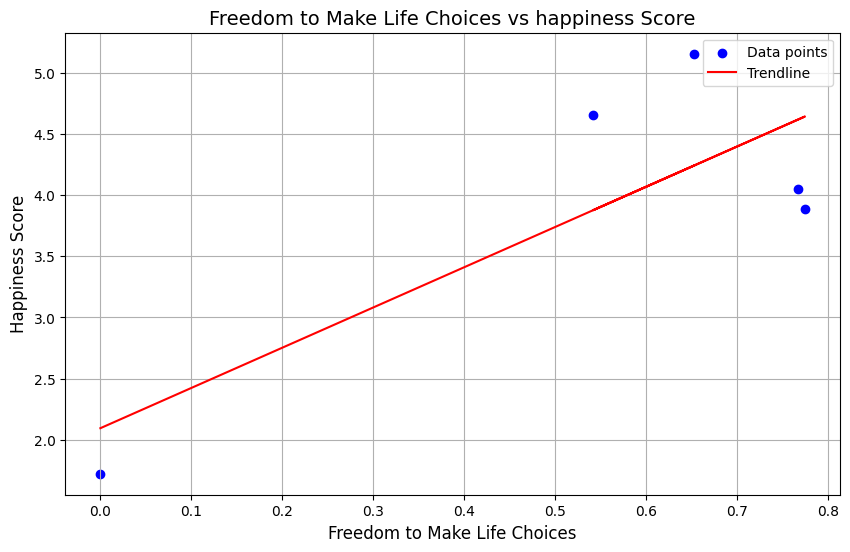

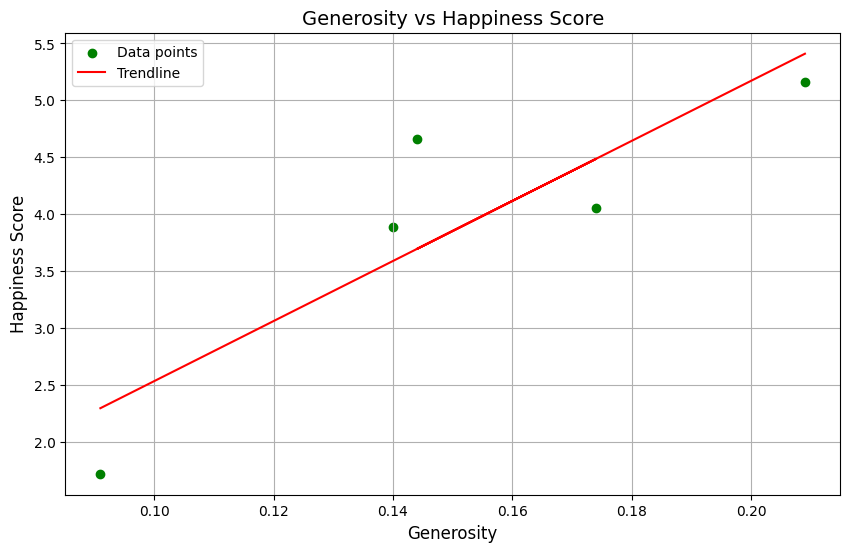

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for 'Freedom to Make Life Choices' vs 'Score'
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Freedom to make life choices'], south_asia_df['score'], color='blue', label='Data points')

# Calculate the trendline (linear regression)
coefficients = np.polyfit(south_asia_df['Freedom to make life choices'], south_asia_df['score'], 1)
trendline = np.polyval(coefficients, south_asia_df['Freedom to make life choices'])

# Plot the trendline
plt.plot(south_asia_df['Freedom to make life choices'], trendline, color='red', label='Trendline')

# Add labels and title
plt.title('Freedom to Make Life Choices vs happiness Score', fontsize=14)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Plot for 'Generosity' vs 'Score'
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Generosity'], south_asia_df['score'], color='green', label='Data points')

# Calculate the trendline (linear regression)
coefficients = np.polyfit(south_asia_df['Generosity'], south_asia_df['score'], 1)
trendline = np.polyval(coefficients, south_asia_df['Generosity'])

# Plot the trendline
plt.plot(south_asia_df['Generosity'], trendline, color='red', label='Trendline')

# Add labels and title
plt.title('Generosity vs Happiness Score', fontsize=14)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


 3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
 South Asian countries.

Ans: For South Asian countries, the strongest relationship with the Happiness Score is observed in Freedom to Make Life Choices, showing a strong positive correlation. Countries with greater freedom generally report higher happiness. On the other hand, Generosity has the weakest relationship, with little to no correlation to the Happiness Score. This suggests that while personal freedoms significantly impact happiness, generosity alone does not play a major role in determining it.

For example: Maldives has a high freedom score(around 0.6) and also ranks high in happiness, showing a clear positive relationship between these metrics. And Nepal has a relatively high generosity score(around 0.3) but a moderate happiness score, indicating that generosity does not strongly influence overall happiness in the region.

These examples highlights howw certain factors like freedom correlate strongly with happiness, while others like generosity have a weaker impact.

 Task- 5- Gap Analysis:

 Tasks:
 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
 for each South Asian country.

In [ ]:
# Add a new column 'GDP-Score Gap' which is the difference between 'GDP per Capita' and 'Score'
south_asia_df.loc[:,'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Display the updated DataFrame to check the new column
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP_ZScore,Score_ZScore,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,0.115838,0.959573,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,0.366049,0.578874,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,0.815501,0.120668,-2.888
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,0.611626,0.006991,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,1.677338,1.652124,-1.093


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [ ]:
# Rank the South Asian countries by the 'GDP-Score Gap' in ascending order
ascending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)

# Rank the South Asian countries by the 'GDP-Score Gap' in descending order
descending_rank = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display the rankings
print("Ranked by GDP-Score Gap (Ascending):")
print(ascending_rank[['Country name', 'GDP-Score Gap']])

print("\nRanked by GDP-Score Gap (Descending):")
print(descending_rank[['Country name', 'GDP-Score Gap']])


Ranked by GDP-Score Gap (Ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
142  Afghanistan         -1.093

Ranked by GDP-Score Gap (Descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

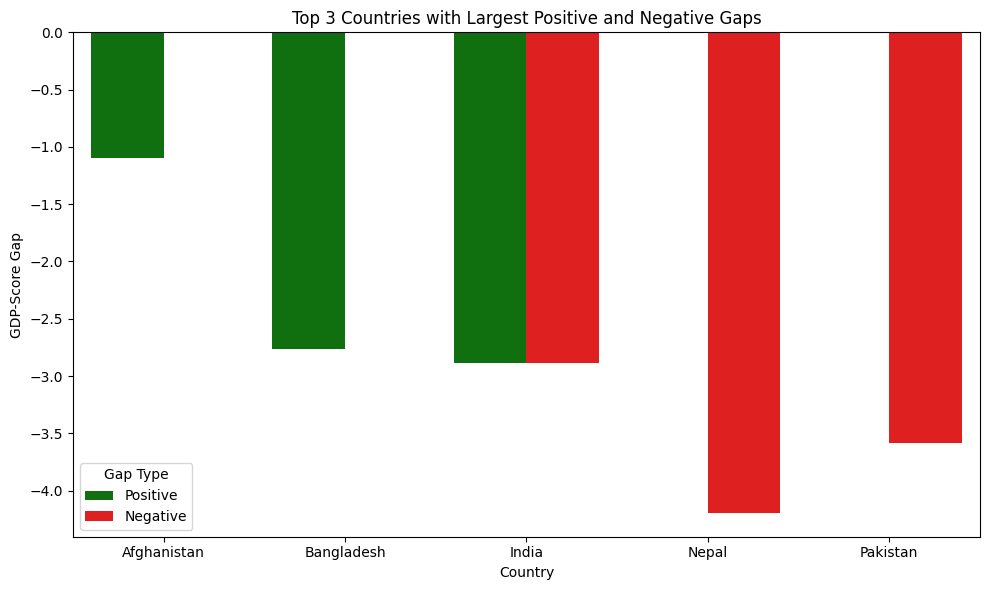

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate GDP-Score Gap
south_asia_df.loc['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Find Top 3 Positive and Negative Gaps
top_3_positive_gaps = south_asia_df.nlargest(3, 'GDP-Score Gap')
top_3_negative_gaps = south_asia_df.nsmallest(3, 'GDP-Score Gap')

# Combine data for visualization
gap_data = pd.concat([top_3_positive_gaps, top_3_negative_gaps])
gap_data['Gap Type'] = ['Positive'] * 3 + ['Negative'] * 3

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_data, x='Country name', y='GDP-Score Gap', hue='Gap Type', palette={'Positive': 'green', 'Negative': 'red'})
plt.title('Top 3 Countries with Largest Positive and Negative Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Ans: The GDP-Score Gap reflects the disparity between economic wealth and happiness in South Asian countries. Analyzing the reasons behind these gaps:

Positive Gaps:

Reasons: Countries like Maldives may have high GDP due to tourism but relatively lower happiness due to social or political issues, lack of freedom, or inequality.

Implications: These countries need to focus on improving social support, healthcare, and freedom to ensure that economic prosperity translates into better happiness levels.

Negative Gaps:

Reasons: Countries like Bhutan exhibit high happiness scores despite low GDP because of strong cultural values, social cohesion, and environmental policies (e.g., Gross National Happiness).

Implications: These countries demonstrate that happiness isn't solely dependent on GDP. Other South Asian countries could learn from such models to improve well-being through non-economic factors like governance, culture, and social equality.

Overall Implications:

The analysis highlights the importance of balancing economic growth with social and environmental well-being. Policies should address gaps by targeting areas like education, healthcare, and community development to reduce disparities.

 3.3 Problem- 3- Comparative Analysis:

 Task- 1- Setup Task- Preparing the Middle Eastern Dataset:

 Tasks:

 1. Similar in Task- 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
 following list:

 middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
 "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
 "United Arab Emirates", "Yemen"]

In [ ]:
import pandas as pd

# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataframe to include only Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Complete the following task:
 1. Descriptive Statistics:

 • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

In [ ]:
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print("South Asia - Mean:", south_asia_mean)
print("South Asia - Standard Deviation:", south_asia_std)
print("Middle East - Mean:", middle_east_mean)
print("Middle East - Standard Deviation:", middle_east_std)

South Asia - Mean: 3.8952000000000004
South Asia - Standard Deviation: 1.3160025455902433
Middle East - Mean: 5.412100000000001
Middle East - Standard Deviation: 1.5662011684327144


• Which region has higher happiness Scores on average?

In [ ]:
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
elif middle_east_mean > south_asia_mean:
    print("The Middle East has a higher average happiness score.")
else:
    print("Both regions have the same average happiness score.")

The Middle East has a higher average happiness score.


 2. Top and Bottom Performers:

 • Identify the top 3 and bottom 3 countries in each region based on the score.

In [ ]:
# Top 3 and Bottom 3 countries in South Asia based on Score
top_3_south_asia = south_asia_df.sort_values(by='score', ascending=False).head(3)
bottom_3_south_asia = south_asia_df.sort_values(by='score', ascending=True).head(3)

# Top 3 and Bottom 3 countries in Middle East based on Score
top_3_middle_east = middle_east_df.sort_values(by='score', ascending=False).head(3)
bottom_3_middle_east = middle_east_df.sort_values(by='score', ascending=True).head(3)

# Display the results
print("Top 3 South Asian countries based on Score:")
print(top_3_south_asia[['Country name', 'score']])

print("\nBottom 3 South Asian countries based on Score:")
print(bottom_3_south_asia[['Country name', 'score']])

print("\nTop 3 Middle Eastern countries based on Score:")
print(top_3_middle_east[['Country name', 'score']])

print("\nBottom 3 Middle Eastern countries based on Score:")
print(bottom_3_middle_east[['Country name', 'score']])


Top 3 South Asian countries based on Score:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian countries based on Score:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
125        India  4.054

Top 3 Middle Eastern countries based on Score:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern countries based on Score:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


• Plot bar charts comparing these charts.

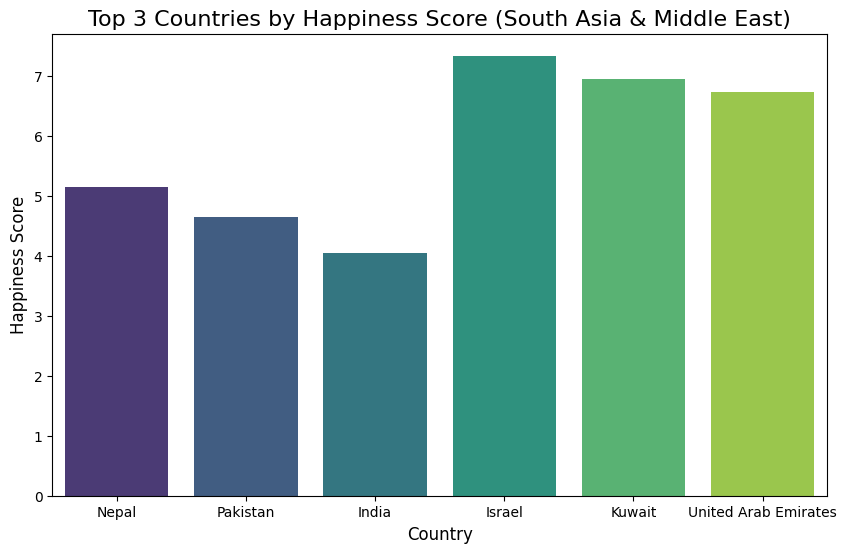

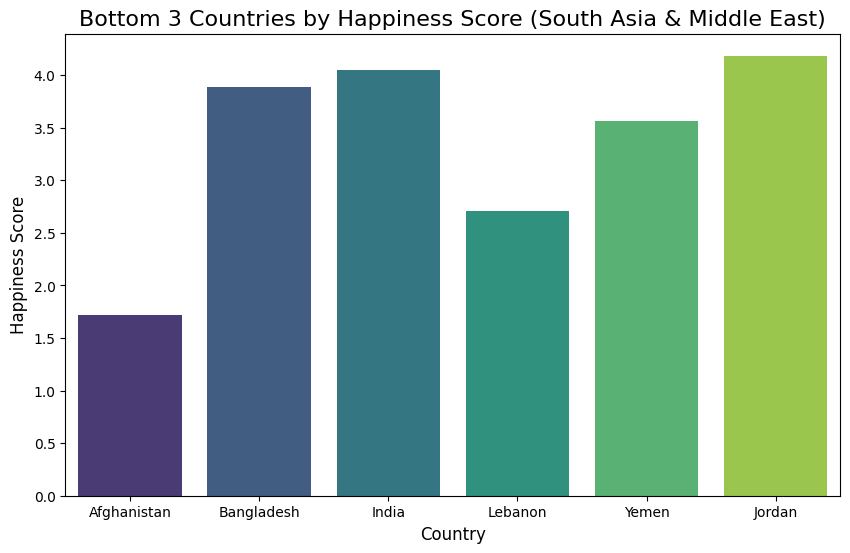

In [ ]:
# Combine top and bottom performers for both regions into single DataFrames
top_performers = pd.concat([top_3_south_asia, top_3_middle_east])
bottom_performers = pd.concat([bottom_3_south_asia, bottom_3_middle_east])

# Function to create bar charts
def plot_bar_chart(df, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country name', y='score', data=df, hue='Country name', palette='viridis', dodge=False)
    plt.title(title, fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Happiness Score', fontsize=12)
    plt.show()

# Plot the bar charts
plot_bar_chart(top_performers, 'Top 3 Countries by Happiness Score (South Asia & Middle East)')
plot_bar_chart(bottom_performers, 'Bottom 3 Countries by Happiness Score (South Asia & Middle East)')

 3. Metric Comparisons:

 • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
 between the regions using grouped bar charts.

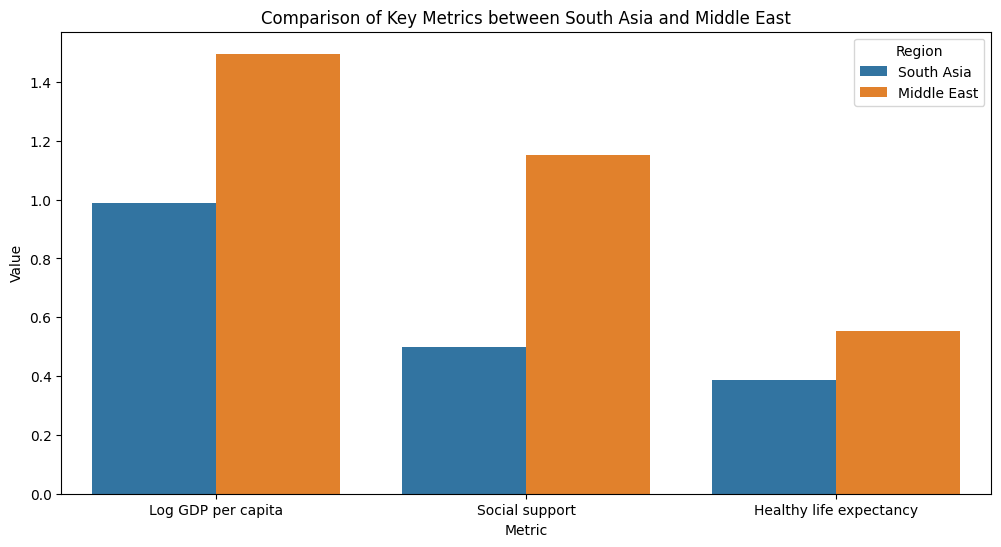

In [ ]:
# Create a combined DataFrame for easier plotting
combined_df = pd.concat([
    south_asia_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].assign(Region='South Asia'),
    middle_east_df[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']].assign(Region='Middle East')
])

# Melt the DataFrame to long format for grouped bar plots
melted_df = combined_df.melt(
    id_vars=['Country name', 'Region'],
    value_vars=['Log GDP per capita', 'Social support', 'Healthy life expectancy'],
    var_name='Metric',
    value_name='Value'
)

# Plotting grouped bar charts
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=melted_df, errorbar=None)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

• Which metrics show the largest disparity between the two regions?

Metrics with the largest disparities between South Asia and the Middle East:
- Social support: 0.65
- Log GDP per capita: 0.51
- Healthy life expectancy: 0.17
- Perceptions of corruption: 0.03
- Generosity: 0.01
- Freedom to make life choices: 0.01


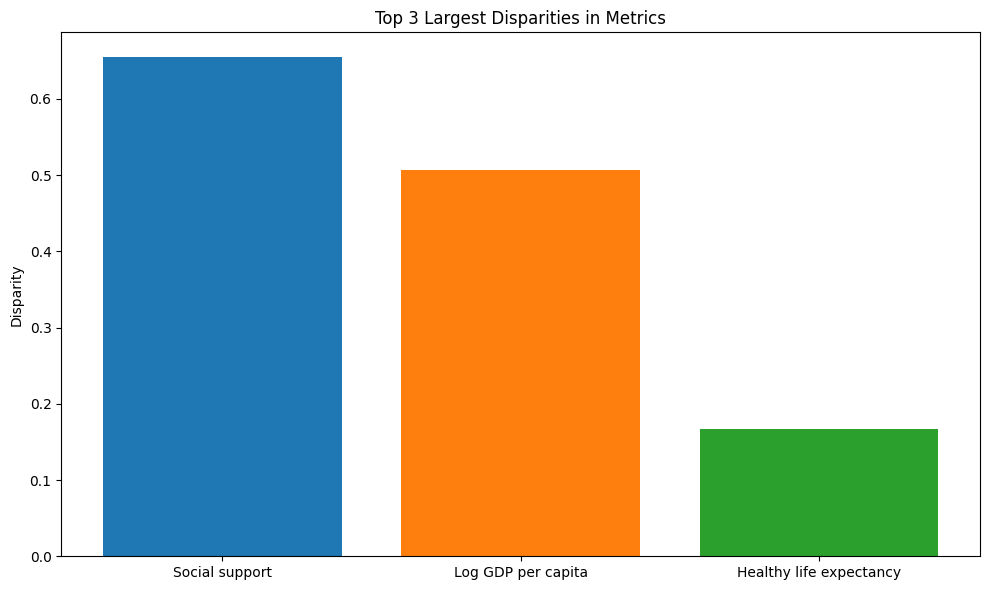

In [ ]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

disparities = {}
for metric in metrics:
  disparity = abs(south_asia_df[metric].mean() - middle_east_df[metric].mean())
  disparities[metric] = disparity

# Find the metrics with the largest disparities
sorted_disparities = dict(sorted(disparities.items(), key=lambda item: item[1], reverse=True))

print("Metrics with the largest disparities between South Asia and the Middle East:")
for metric, disparity in sorted_disparities.items():
    print(f"- {metric}: {disparity:.2f}")

# Visualization of the top 3 disparities
top_3_metrics = list(sorted_disparities.keys())[:3]
plt.figure(figsize=(10,6))
for metric in top_3_metrics:
    plt.bar(metric, disparities[metric], label=metric)

plt.ylabel('Disparity')
plt.title('Top 3 Largest Disparities in Metrics')
plt.tight_layout()
plt.show()

 4. Happiness Disparity:

 • Compute the range (max- min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
# Calculate range and coefficient of variation for 'Score' in South Asia
south_asia_range_score = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv_score = (south_asia_df['score'].std() / south_asia_df['score'].mean()) * 100

print(f"South Asia - Range of Score: {south_asia_range_score}")
print(f"South Asia - Coefficient of Variation of Score: {south_asia_cv_score:.2f}%")

# Calculate range and coefficient of variation for 'Score' in the Middle East
middle_east_range_score = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv_score = (middle_east_df['score'].std() / middle_east_df['score'].mean()) * 100

print(f"Middle East - Range of Score: {middle_east_range_score}")
print(f"Middle East - Coefficient of Variation of Score: {middle_east_cv_score:.2f}%")

South Asia - Range of Score: 3.4370000000000003
South Asia - Coefficient of Variation of Score: 33.79%
Middle East - Range of Score: 4.634
Middle East - Coefficient of Variation of Score: 28.94%


 • Which region has greater variability in happiness?

In [ ]:
if south_asia_cv_score > middle_east_cv_score:
    print("South Asia has greater variability in happiness.")
elif middle_east_cv_score > south_asia_cv_score:
    print("The Middle East has greater variability in happiness.")
else:
    print("Both regions have the same variability in happiness.")

South Asia has greater variability in happiness.


 5. Correlation Analysis:

 • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
 Generosity within each region.

In [ ]:
# Correlation Analysis for South Asia
correlation_freedom_sa = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity_sa = south_asia_df['Generosity'].corr(south_asia_df['score'])

print("South Asia:")
print(f"Correlation between Freedom to make life choices and Score: {correlation_freedom_sa}")
print(f"Correlation between Generosity and Score: {correlation_generosity_sa}")

# Correlation Analysis for Middle East
correlation_freedom_me = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
correlation_generosity_me = middle_east_df['Generosity'].corr(middle_east_df['score'])

print("\nMiddle East:")
print(f"Correlation between Freedom to make life choices and Score: {correlation_freedom_me}")
print(f"Correlation between Generosity and Score: {correlation_generosity_me}")


South Asia:
Correlation between Freedom to make life choices and Score: 0.801497903141921
Correlation between Generosity and Score: 0.8773326267276359

Middle East:
Correlation between Freedom to make life choices and Score: 0.8632202433827543
Correlation between Generosity and Score: 0.6275236536964182


• Create scatter plots to visualize and interpret the relationships.

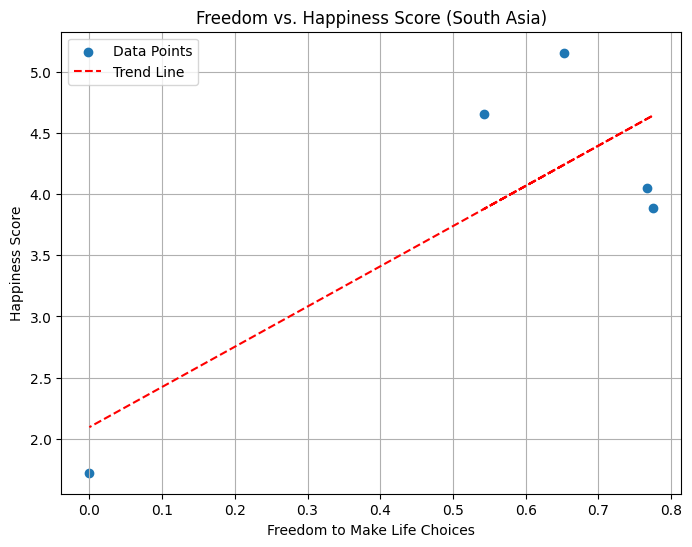

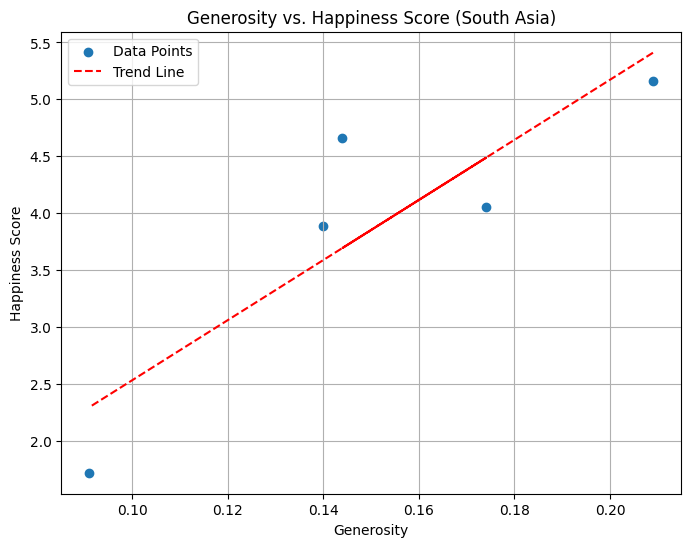

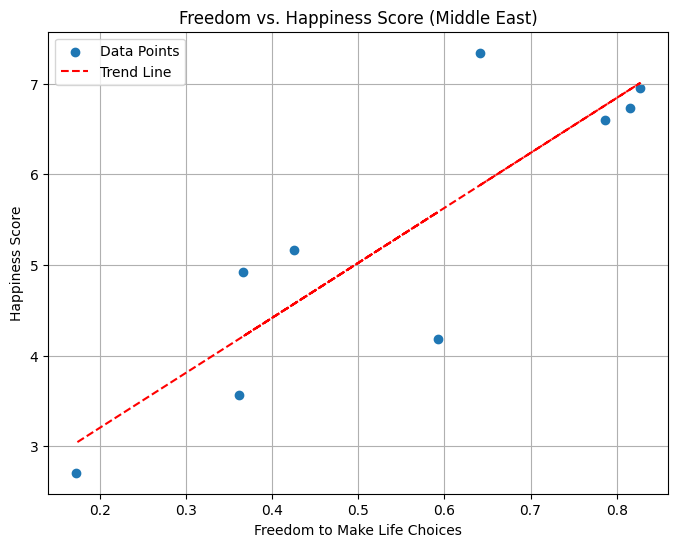

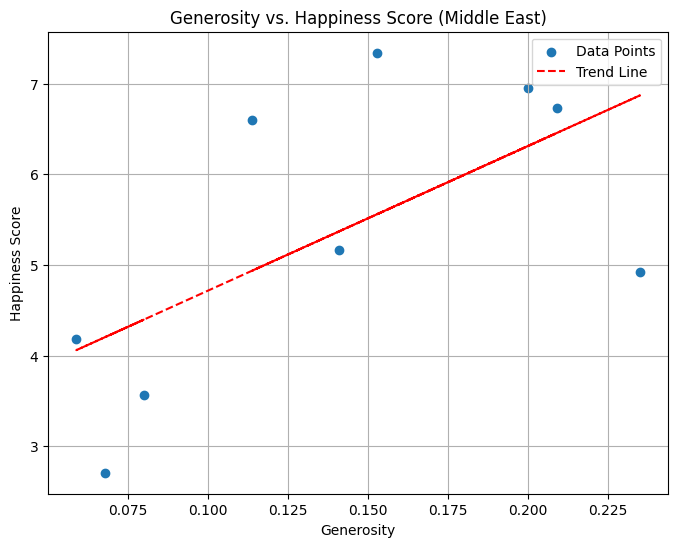

In [ ]:
import matplotlib.pyplot as plt

# Ensure data is clean and numeric
def clean_data(df, x_col, y_col):
    df = df.dropna(subset=[x_col, y_col])
    df[x_col] = pd.to_numeric(df[x_col], errors='coerce')
    df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    return df.dropna(subset=[x_col, y_col])

# Plot scatter and regression
def plot_scatter_with_trendline(df, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], label="Data Points")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Fit and plot regression line
    if len(df) >= 2:  # Ensure at least 2 points for regression
        z = np.polyfit(df[x_col], df[y_col], 1)
        p = np.poly1d(z)
        plt.plot(df[x_col], p(df[x_col]), "r--", label="Trend Line")
    else:
        print(f"Not enough data points for regression in {title}.")

    # Add grid and legend
    plt.grid(True)
    plt.legend()
    plt.show()

# Scatter plot for Freedom to Make Life Choices vs. Score (South Asia)
south_asia_df = clean_data(south_asia_df, 'Freedom to make life choices', 'score')
plot_scatter_with_trendline(south_asia_df, 'Freedom to make life choices', 'score',
                            'Freedom vs. Happiness Score (South Asia)',
                            'Freedom to Make Life Choices', 'Happiness Score')

# Scatter plot for Generosity vs. Score (South Asia)
south_asia_df = clean_data(south_asia_df, 'Generosity', 'score')
plot_scatter_with_trendline(south_asia_df, 'Generosity', 'score',
                            'Generosity vs. Happiness Score (South Asia)',
                            'Generosity', 'Happiness Score')

# Scatter plot for Freedom to Make Life Choices vs. Score (Middle East)
middle_east_df = clean_data(middle_east_df, 'Freedom to make life choices', 'score')
plot_scatter_with_trendline(middle_east_df, 'Freedom to make life choices', 'score',
                            'Freedom vs. Happiness Score (Middle East)',
                            'Freedom to Make Life Choices', 'Happiness Score')

# Scatter plot for Generosity vs. Score (Middle East)
middle_east_df = clean_data(middle_east_df, 'Generosity', 'score')
plot_scatter_with_trendline(middle_east_df, 'Generosity', 'score',
                            'Generosity vs. Happiness Score (Middle East)',
                            'Generosity', 'Happiness Score')


 6. Outlier Detection:

 • Identify outlier countries in both regions based on Score and GDP per Capita.

In [ ]:
# Function to calculate outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# South Asia Outliers
south_asia_score_outliers = find_outliers(south_asia_df, 'score')
south_asia_gdp_outliers = find_outliers(south_asia_df, 'Log GDP per capita')

# Middle East Outliers
middle_east_score_outliers = find_outliers(middle_east_df, 'score')
middle_east_gdp_outliers = find_outliers(middle_east_df, 'Log GDP per capita')

# Combine results
print("South Asia Score Outliers:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nSouth Asia GDP Outliers:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nMiddle East GDP Outliers:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])

South Asia Score Outliers:
    Country name  score
142  Afghanistan  1.721

South Asia GDP Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East GDP Outliers:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


• Plot these outliers and discuss their implications.

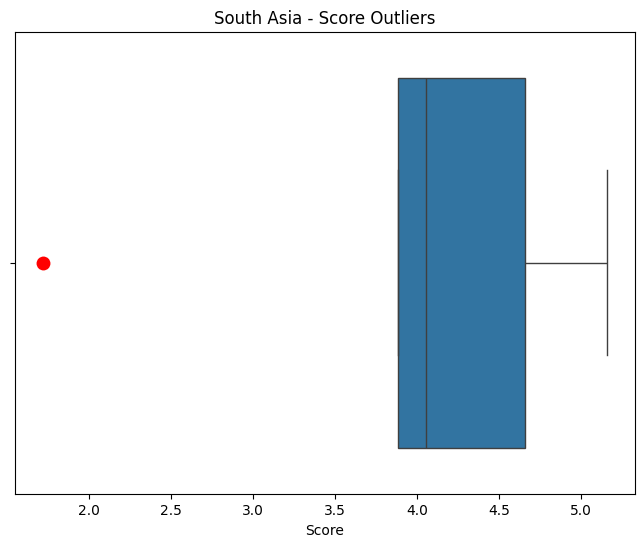

South Asia - Score Outliers:
    Country name  score
142  Afghanistan  1.721


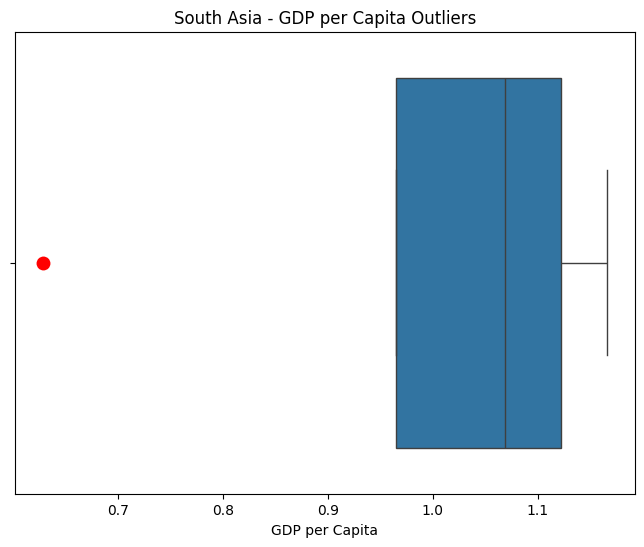

South Asia - GDP per Capita Outliers:
    Country name  Log GDP per capita
142  Afghanistan               0.628
No outliers found for Score in Middle East.
No outliers found for GDP per Capita in Middle East.


In [ ]:
# Plotting function
def plot_outliers(df, outliers, column, region, metric):
  if not outliers.empty:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    sns.stripplot(x=outliers[column], color='red', size=10)
    plt.title(f'{region} - {metric} Outliers')
    plt.xlabel(metric)
    plt.show()

    print(f'{region} - {metric} Outliers:')
    print(outliers[['Country name', column]])
  else:
        print(f"No outliers found for {metric} in {region}.")


# Plotting outliers for score in South Asia
plot_outliers(south_asia_df, south_asia_score_outliers, 'score', 'South Asia', 'Score')

# Plotting outliers for GDP per Capita in South Asia
plot_outliers(south_asia_df, south_asia_gdp_outliers, 'Log GDP per capita', 'South Asia', 'GDP per Capita')


# Plotting outliers for score in Middle East
plot_outliers(middle_east_df, middle_east_score_outliers, 'score', 'Middle East', 'Score')

# Plotting outliers for GDP per Capita in Middle East
plot_outliers(middle_east_df, middle_east_gdp_outliers, 'Log GDP per capita', 'Middle East', 'GDP per Capita')


Implications:

South Asia: Afghanistan, as an outlier with very low GDP and happiness scores, pulls down regional averages and highlights severe challenges like poverty and instability. Addressing these issues can improve overall regional performance.

Middle East: The absence of outliers suggests consistent GDP and happiness levels, but it might also mean significant problems (e.g., conflicts in Yemen or Syria) are hidden within broader trends.

 7. Visualization:

 • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

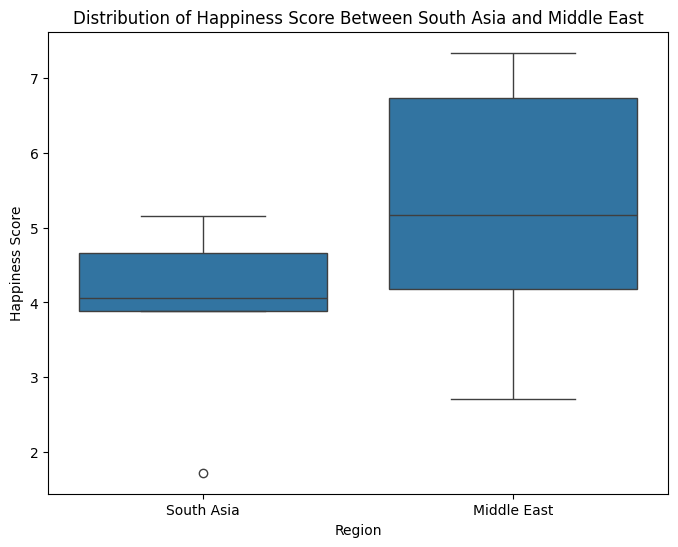

In [ ]:
# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_df[['score']].assign(Region='South Asia'),
    middle_east_df[['score']].assign(Region='Middle East')
]))
plt.title('Distribution of Happiness Score Between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

• Interpret the key differences in distribution shapes, medians, and outliers.

1. Distribution Shape:

South Asia: The distribution is likely skewed left (negatively skewed), with most countries having low GDP and happiness scores, but a few moderately higher values (e.g., Maldives).

Middle East: The distribution is more uniform or slightly right-skewed, with a mix of countries showing moderate to high GDP and happiness levels (e.g., Qatar).


2. Median:

South Asia: The median score and GDP are lower, reflecting the region's overall economic and social challenges.

Middle East: The median is higher for both happiness scores and GDP, indicating better average performance in wealth and well-being.


3. Outliers:

South Asia: Outliers like Afghanistan significantly drag down the regional averages due to extremely low happiness and GDP values.

Middle East: High GDP outliers like Qatar inflate the regional averages, while low-score countries like Yemen might not appear as outliers but represent challenges.


The comparison shows that South Asia faces greater inequality and lower overall prosperity, while the Middle East has a more varied economic distribution with higher medians but also unique challenges like wealth concentration.